In [9]:
import gym
import numpy as np
from ddpg_tf2 import Agent
from utils import plot_learning_curve

In [10]:
pwd

'M:\\IIST\\SEM 2\\REINFORCEMENT LEARNING\\Presentations'

In [11]:
cd M:\IIST\SEM 2\REINFORCEMENT LEARNING\Presentations

M:\IIST\SEM 2\REINFORCEMENT LEARNING\Presentations


[2021-04-17 19:46:38,445] Making new env: Pendulum-v0
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\gym\envs\registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


... saving models ...
episode  0 score -1197.8 avg score -1197.8
episode  1 score -1481.4 avg score -1339.6
episode  2 score -1754.1 avg score -1477.8
episode  3 score -1600.0 avg score -1508.3
episode  4 score -1344.2 avg score -1475.5
episode  5 score -1731.5 avg score -1518.2
episode  6 score -1167.6 avg score -1468.1
episode  7 score -883.2 avg score -1395.0
episode  8 score -1006.3 avg score -1351.8
episode  9 score -1596.1 avg score -1376.2
episode  10 score -995.7 avg score -1341.6
episode  11 score -1054.5 avg score -1317.7
episode  12 score -1221.0 avg score -1310.3
episode  13 score -1065.6 avg score -1292.8
episode  14 score -755.4 avg score -1257.0
episode  15 score -531.8 avg score -1211.6
... saving models ...
episode  16 score -798.9 avg score -1187.4
... saving models ...
episode  17 score -849.1 avg score -1168.6
episode  18 score -1207.3 avg score -1170.6
... saving models ...
episode  19 score -634.9 avg score -1143.8
episode  20 score -1196.9 avg score -1146.4
... s

... saving models ...
episode  141 score -127.1 avg score -288.4
... saving models ...
episode  142 score -232.8 avg score -288.3
... saving models ...
episode  143 score -234.8 avg score -280.5
... saving models ...
episode  144 score -240.3 avg score -264.4
... saving models ...
episode  145 score -119.3 avg score -264.3
... saving models ...
episode  146 score -122.1 avg score -260.9
episode  147 score -237.1 avg score -262.0
episode  148 score -240.5 avg score -264.4
episode  149 score -245.4 avg score -264.5
episode  150 score -237.6 avg score -266.8
episode  151 score -127.2 avg score -262.1
... saving models ...
episode  152 score -122.5 avg score -257.0
... saving models ...
episode  153 score -122.3 avg score -254.6
... saving models ...
episode  154 score -124.0 avg score -249.6
... saving models ...
episode  155 score -126.4 avg score -247.3
... saving models ...
episode  156 score -125.3 avg score -244.9
episode  157 score -467.3 avg score -247.2
episode  158 score -357.5 a

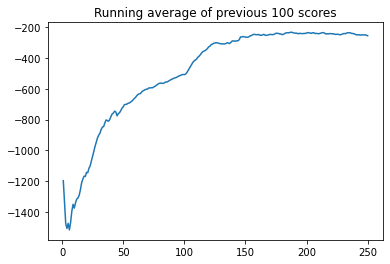

In [12]:
import gym
import numpy as np
from ddpg_tf2 import Agent
from utils import plot_learning_curve
if __name__ == '__main__':
    env = gym.make('Pendulum-v0')
    agent = Agent(input_dims=env.observation_space.shape, env=env,n_actions=env.action_space.shape[0])
    n_games = 250

    figure_file = 'plots/pendulum.png'

    best_score = env.reward_range[0]
    score_history = []
    load_checkpoint = False

    if load_checkpoint:
        n_steps = 0
        while n_steps <= agent.batch_size:
            observation = env.reset()
            action = env.action_space.sample()
            observation_, reward, done, info = env.step(action)
            agent.remember(observation, action, reward, observation_, done)
            n_steps += 1
        agent.learn()
        agent.load_models()
        evaluate = True
    else:
        evaluate = False

    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action = agent.choose_action(observation, evaluate)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.remember(observation, action, reward, observation_, done)
            if not load_checkpoint:
                agent.learn()
            observation = observation_

        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        if avg_score > best_score:
            best_score = avg_score
            if not load_checkpoint:
                agent.save_models()

        print('episode ', i, 'score %.1f' % score, 'avg score %.1f' % avg_score)

    if not load_checkpoint:
        x = [i+1 for i in range(n_games)]
        plot_learning_curve(x, score_history, figure_file)



In [ ]:
env.action_space.shape[0]